In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [66]:
data=pd.read_csv("Complaints.csv")
data.head()

,CASE_ID,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,...,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,RESOLUTION,RESOLUTION_DESCRIPTION,CASE_DESC,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,CAS-1060890-L3D6Q6,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,19.06.2022 06:07,DANA,21.06.2022 13:41,...,2.0,Actual Complaint,Phone,NaN,NaN,NaN,CBU / EBU - personal view,Technical,Internet,Technical complaint
1,CAS-388567-W4B9Q3,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,04.04.2022 14:11,TCRMService,05.04.2022 12:13,...,1.0,Not Actual Complaint,Phone,NaN,NaN,NaN,System Administrator,Commercial,Mobile,Commercial claim
2,CAS-1494939-L9F0X7,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,03.08.2022 03:20,MOUTAZ,03.08.2022 03:20,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
3,CAS-1059985-K3Y9F7,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,18.06.2022 20:38,MOATH,18.06.2022 20:38,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,NaN,Technical,Internet,Technical complaint
4,CAS-1239942-Y1S2F5,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,06.07.2022 01:22,IBRAHIM,06.07.2022 01:22,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint


In [67]:
del data['CASE_ID']

In [68]:
del data ['OPEN_DATE']

In [69]:
del data['CLOSE_DATE']

In [70]:
del data['RESOLUTION']

In [71]:
del data['RESOLUTION_DESCRIPTION']

In [72]:
del data['CASE_DESC']

In [73]:
del data['OPEN_USER']

In [74]:
del data['CLOSE_USER']

In [75]:
data.isnull().sum()

OFFER_NAME            1293
CUSTOMER_TYPE            0
CUSTOMER_GROUP        1348
CURRENT_STATUS           0
ESCALATION_FLAG          0
ESCALATED_GROUP       7055
CLOSE_GROUP           4890
AGE_BRACKET            119
ACTUAL_COMPLAINT         0
CALLBACK_MECHANISM    7277
OPEN_GR               4561
COMPLAINT_TYPE           0
PRODUCT                  0
CASE                     0
dtype: int64

In [76]:
data["OFFER_NAME"].value_counts()

FTTH Home                 3914
Bitstream Home            2787
OnLine Prepaid             895
Eagle Army Cell            269
Orange IEW 4G 1TB - 2Y     118
                          ... 
GAM CC3 PreCorp              1
Orange IEW 4G 2TB            1
Orange IEW 4G 500GB          1
Pruned-447                   1
Crystal5                     1
Name: OFFER_NAME, Length: 140, dtype: int64

In [77]:
data['OFFER_NAME'].fillna('UNKNOWN', inplace = True)
data.head()

,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,CLOSE_GROUP,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,F&I_BO,2.0,Actual Complaint,Phone,CBU / EBU - personal view,Technical,Internet,Technical complaint
1,UNKNOWN,CBU,NaN,Resolved,Yes,Mobile_BO,Mobile_BO,1.0,Not Actual Complaint,Phone,System Administrator,Commercial,Mobile,Commercial claim
2,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,CYC_COMMERCAIL_TEAM,1.0,User Not Filled,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
3,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,NaN,1.0,User Not Filled,NaN,NaN,Technical,Internet,Technical complaint
4,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,CYC_COMMERCAIL_TEAM,1.0,User Not Filled,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint


In [78]:
data['AGE_BRACKET'].fillna('ACTIVE', inplace = True)

In [79]:
data['CUSTOMER_GROUP'].value_counts()


FTTH Home                  3648
Wanadoo-ADSL-Res           2465
Prepaid                    1323
Internet everywhere IEW     309
IP Test                     183
                           ... 
Emp and family ADSL           1
Solo and Soho                 1
Army. APVPN Enterprise        1
GOV.. ADSL Enterprise         1
Premium Internet              1
Name: CUSTOMER_GROUP, Length: 73, dtype: int64

In [80]:
data['CUSTOMER_GROUP']=data['CUSTOMER_GROUP'].fillna(data['CUSTOMER_GROUP'].mode()[0])


In [81]:
data['ESCALATED_GROUP'].fillna('Not Escalated', inplace = True)

In [82]:
data['CALLBACK_MECHANISM'].value_counts()

SMS            1419
Phone          1361
E-mail          345
Auto Dialer      13
Name: CALLBACK_MECHANISM, dtype: int64

In [83]:
data['CALLBACK_MECHANISM']=data['CALLBACK_MECHANISM'].fillna(np.random.choice(['SMS','Phone'],p=[0.5,0.5]))

In [84]:
probability = data['OPEN_GR'].value_counts() / data['OPEN_GR'].count()
data['OPEN_GR'] = data['OPEN_GR'].fillna(pd.Series(np.random.choice(list(probability.index), p=probability, size=len(data))))

In [85]:
probability = data['CLOSE_GROUP'].value_counts() / data['CLOSE_GROUP'].count()
data['CLOSE_GROUP'] = data['CLOSE_GROUP'].fillna(pd.Series(np.random.choice(list(probability.index), p=probability, size=len(data))))

In [86]:
data['CLOSE_GROUP'].value_counts()

CYC_COMMERCAIL_TEAM               2566
F&I_BO                            1290
Mobile_BO                         1230
CBU A– OJO CC 1st Layer            821
CBU A– CYC CC 1st Layer            811
ORANGE_MONEY_BO                    783
CBU/EBU A– ARS MTT                 638
CENTRALIZED_BACK_OFFICE            317
Disputes_BO                        309
CBU – OJO CC 1st Layer             262
OW_SWEIFIEH_West                   194
CCU & FTTH field Sales             138
Sales_Devices_BO                   120
OW_MECCAMALL_West                  102
Nokia_BO                            87
EBU - Contact Center CC Pro         68
Delivery_BO                         64
Risk_BO                             59
EBU - Contact Center Complaint      58
CBU/EBU – ARS MTT                   53
Telesales_Sales_BO                  53
Collection_BO                       50
EBU - Contact Center CC             49
OW_TLAALALI_West                    46
ITN-OSP complaints                  44
ESHOP_BO                 

In [87]:
data['OPEN_GR'].value_counts()

CBU - CC 1st Layer A                    5152
System Administrator                    2189
Priviliged OM                           1654
CBU - CC 2nd Layers                      863
CBU - CC 1st Layer                       255
CBU / EBU - personal view                 88
CBU - Sales - Sales rep                   88
EBU-Contact Center CC                     36
CBU / EBU - Report Extract                36
EBU-Collection                            14
EBU-Contact Center Complaint              11
CBU - 1st layer- update opprt             10
CBU - Sales support Back office team       8
EBU - Contact Center CC Pro                4
CBU - Sales - Supervisor                   2
CBU - BO Billing team                      2
Privileged CSR                             2
CBU - Sales - Shop manager                 1
Name: OPEN_GR, dtype: int64

In [88]:
data

,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,CLOSE_GROUP,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,F&I_BO,2.0,Actual Complaint,Phone,CBU / EBU - personal view,Technical,Internet,Technical complaint
1,UNKNOWN,CBU,FTTH Home,Resolved,Yes,Mobile_BO,Mobile_BO,1.0,Not Actual Complaint,Phone,System Administrator,Commercial,Mobile,Commercial claim
2,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,Not Escalated,CYC_COMMERCAIL_TEAM,1.0,User Not Filled,SMS,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
3,FTTH Home,CBU,FTTH Home,Resolved,No,Not Escalated,CBU – OJO CC 1st Layer,1.0,User Not Filled,SMS,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
4,FTTH Home,CBU,FTTH Home,Resolved,No,Not Escalated,CYC_COMMERCAIL_TEAM,1.0,User Not Filled,SMS,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10410,OnLine Prepaid,CBU,Prepaid,Resolved,No,Not Escalated,Mobile_BO,1.0,User Not Filled,SMS,CBU - CC 1st Layer,Commercial,Mobile,Commercial claim
10411,FTTH Home,CBU,FTTH Home,Resolved,No,Not Escalated,Disputes_BO,1.0,User Not Filled,SMS,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
10412,FTTB Corporate,EBU,FTTB Corporate,Resolved,No,Not Escalated,CYC_COMMERCAIL_TEAM,1.0,User Not Filled,SMS,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
10413,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,Not Escalated,CYC_COMMERCAIL_TEAM,1.0,User Not Filled,SMS,CBU - CC 1st Layer A,Technical,Internet,Technical complaint


In [89]:
data = data.apply(lambda x: pd.factorize(x)[0])

In [90]:
X = data.drop(["COMPLAINT_TYPE"], axis=1)

y = data["COMPLAINT_TYPE"]

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)


In [92]:
#@title KNN
from sklearn.neighbors import KNeighborsClassifier

classifer = KNeighborsClassifier(n_neighbors=3 )
# importing accuracy_score
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

knn_accuracy_arr=np.zeros(10)
knn_precision_arr=np.zeros(10)
knn_recall_arr=np.zeros(10)
knn_f1_score_arr=np.zeros(10)
for i in range(10):
  classifer.fit(X_train,y_train)
  y_pred= classifer.predict(X_test)
  knn_accuracy_arr[i] = accuracy_score(y_test,y_pred)
  knn_precision_arr[i]=precision_score(y_test,y_pred)
  knn_recall_arr[i]=recall_score(y_test,y_pred)
  knn_f1_score_arr[i]=f1_score(y_test,y_pred)

# printing accuracy
print("Accuracy: ",knn_accuracy_arr.mean())
# printing precision
print("Precision: ",knn_precision_arr.mean())
# printing recall
print("Recall: ",knn_recall_arr.mean())
# printing f1 score
print("F1_score: ",knn_recall_arr.mean())

Accuracy:  0.9395103216514643
Precision:  0.8909465020576132
Recall:  0.8557312252964426
F1_score:  0.8557312252964426


# Descision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
classifer2 = DecisionTreeClassifier()

DT_accuracy_arr=np.zeros(10)
DT_precision_arr=np.zeros(10)
DT_recall_arr=np.zeros(10)
DT_f1_score_arr=np.zeros(10)

for i in range(10):
# Train Decision Tree Classifer
  classifer2 = classifer2.fit(X_train,y_train)
#Predict the response for test dataset
  y_pred = classifer2.predict(X_test)

  DT_accuracy_arr[i] = accuracy_score(y_test,y_pred)
  DT_precision_arr[i]=precision_score(y_test,y_pred)
  DT_recall_arr[i]=recall_score(y_test,y_pred)
  DT_f1_score_arr[i]=f1_score(y_test,y_pred)
# printing accuracy
print("Accuracy: ",DT_accuracy_arr.mean())
# printing precision
print("Precision: ",DT_precision_arr.mean())
# printing recall
print("Recall: ",DT_recall_arr.mean())
# printing f1 score
print("F1_score: ",DT_recall_arr.mean())

Accuracy:  0.9895823331733078
Precision:  0.9706516331020725
Recall:  0.9869565217391305
F1_score:  0.9869565217391305


In [94]:
from sklearn.naive_bayes import GaussianNB
# Create Decision Tree classifer object
classifer3 = GaussianNB()

GB_accuracy_arr=np.zeros(10)
GB_precision_arr=np.zeros(10)
GB_recall_arr=np.zeros(10)
GB_f1_score_arr=np.zeros(10)

for i in range(10):
# Train Decision Tree Classifer
  classifer3 = classifer3.fit(X_train,y_train)
#Predict the response for test dataset
  y_pred = classifer3.predict(X_test)

  GB_accuracy_arr[i] = accuracy_score(y_test,y_pred)
  GB_precision_arr[i]=precision_score(y_test,y_pred)
  GB_recall_arr[i]=recall_score(y_test,y_pred)
  GB_f1_score_arr[i]=f1_score(y_test,y_pred)
# printing accuracy
print("Accuracy: ",GB_accuracy_arr.mean())
# printing precision
print("Precision: ",GB_precision_arr.mean())
# printing recall
print("Recall: ",GB_recall_arr.mean())
# printing f1 score
print("F1_score: ",GB_f1_score_arr.mean())

Accuracy:  0.8372539606337014
Precision:  0.6765327695560253
Recall:  0.6324110671936759
F1_score:  0.6537282941777323


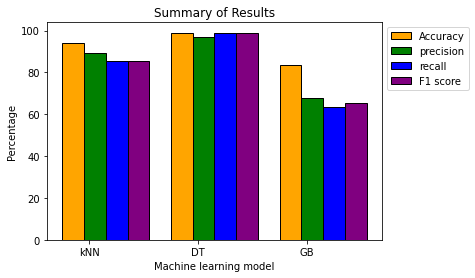

In [95]:
machine_learning_model_name = ['kNN','DT','GB']
machine_learning_model_Accuracy = [knn_accuracy_arr.mean()*100,DT_accuracy_arr.mean()*100,GB_accuracy_arr.mean()*100]
machine_learning_model_precision = [knn_precision_arr.mean()*100,DT_precision_arr.mean()*100,GB_precision_arr.mean()*100]
machine_learning_model_Recall = [knn_recall_arr.mean()*100,DT_recall_arr.mean()*100,GB_recall_arr.mean()*100]
machine_learning_model_F1_score = [knn_recall_arr.mean()*100,DT_recall_arr.mean()*100,GB_f1_score_arr.mean()*100]
X_axis = np.arange(len(machine_learning_model_name ))
  

# creating the bar plot
plt.bar(X_axis+0.1, machine_learning_model_Accuracy, color ='orange',width = 0.20,edgecolor = 'black',label = 'Accuracy')
plt.bar(X_axis + 0.3, machine_learning_model_precision, color ='green',width = 0.20,edgecolor = 'black',label = 'precision')
plt.bar(X_axis + 0.5, machine_learning_model_Recall, color ='blue',width = 0.20,edgecolor = 'black',label = 'recall')
plt.bar(X_axis + 0.7, machine_learning_model_F1_score, color ='purple',width = 0.20,edgecolor = 'black',label = 'F1 score')

plt.xticks(X_axis+0.25, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))


plt.xlabel("Machine learning model")
plt.ylabel("Percentage")
plt.title("Summary of Results")
plt.show()

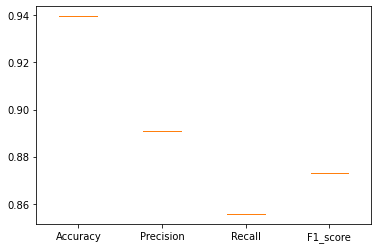

In [96]:
KNN_arr=[knn_accuracy_arr,knn_precision_arr,knn_recall_arr,knn_f1_score_arr]
knn_dict = {'Accuracy': knn_accuracy_arr, 'Precision': knn_precision_arr, 'Recall': knn_recall_arr, 'F1_score': knn_f1_score_arr}
plt.show()
fig, ax = plt.subplots()
#ax.boxplot(knn_dict.values())
ax.set_xticklabels(knn_dict.keys())
plt.boxplot(KNN_arr)
plt.show()

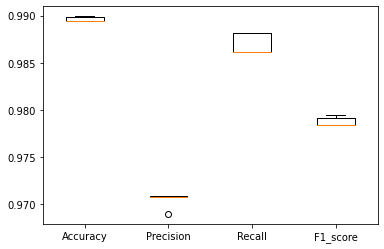

In [97]:
DT_arr=[DT_accuracy_arr,DT_precision_arr,DT_recall_arr,DT_f1_score_arr]
DT_dict = {'Accuracy': DT_accuracy_arr, 'Precision': DT_precision_arr, 'Recall': DT_recall_arr, 'F1_score': DT_f1_score_arr}
fig, ax = plt.subplots()
#ax.boxplot(DT_dict.values())
ax.set_xticklabels(DT_dict.keys())

plt.boxplot(DT_arr)
plt.show()

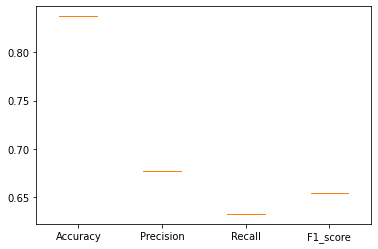

In [98]:
GB_arr=[GB_accuracy_arr,GB_precision_arr,GB_recall_arr,GB_f1_score_arr]
GB_dict = {'Accuracy': GB_accuracy_arr, 'Precision': GB_precision_arr, 'Recall': GB_recall_arr, 'F1_score': GB_f1_score_arr}
fig, ax = plt.subplots()
#ax.boxplot(DT_dict.values())
ax.set_xticklabels(GB_dict.keys())

plt.boxplot(GB_arr)
plt.show()

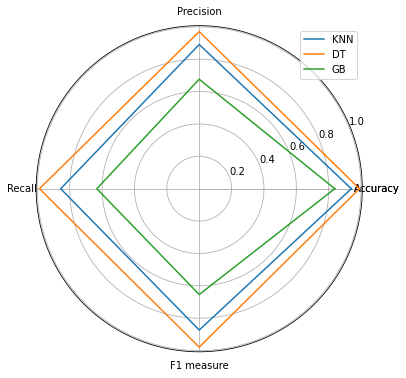

In [99]:
categories=['Accuracy','Precision','Recall','F1 measure']
knn=[knn_accuracy_arr.mean(),knn_precision_arr.mean(),knn_recall_arr.mean(),knn_f1_score_arr.mean()]
DT=[DT_accuracy_arr.mean(),DT_precision_arr.mean(),DT_recall_arr.mean(),DT_f1_score_arr.mean()]
GB=[GB_accuracy_arr.mean(),GB_precision_arr.mean(),GB_recall_arr.mean(),GB_f1_score_arr.mean()]
angles = np.linspace(start=0, stop=2 * np.pi, num=len(knn), endpoint=False)

#Append the first value for all arrays/lists used for visualization to maintain length consistency
knn.append(knn[0])
DT.append(DT[0])
GB.append(GB[0])
categories.append(categories[0])
angles=np.concatenate((angles,[angles[0]]))

#A basic radar chart can be plotted by setting polar=True in subplot function. and providing angles and values as argument to plot function
plt.figure(figsize=(6, 6))
plt.subplot(polar=True)

plt.plot(angles, knn, label='KNN')
# plt.fill(angles, knn, alpha=0.25, color='g')
plt.plot(angles, DT, label='DT')
# plt.fill(angles, DT, alpha=0.25, color='orange')
plt.plot(angles, GB, label='GB')
plt.thetagrids(np.degrees(angles), labels=categories)

plt.legend()
plt.show()